<a href="https://colab.research.google.com/github/mr-nudo/neuronModels1/blob/master/syde552_file_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SYDE 552 Assignment 2: Vision
### Due Monday, February 19, 11:59pm
### Value: 15% of total marks for the course

This assignment covers the mammilian vision system, including both questions about the biology itself and constructing computational models based on Regression and Convolutional Neural Networks.

You can work in groups to do the assignment, but your answers and code must be original to you. Your submission will be a filled-out copy of this notebook (cells for code and written answers provided).

# 1. The Vision System

The purpose of this part of the assignment is to test your knowledge of the brain’s visual system and the relationship between neurobiological features and computational properties. The best answers will discuss both function and anatomy, and will draw on specific anatomical examples to support theoretical claims. You are encouraged to discuss answers with your classmates, consult the slides notes, or use external resources -- but your answers must be your own! In particular, read the Kandel et al. chapters listed on the slides. Expect to write around 5 sentences for each 1 point.

**1.a) [2 marks]** The neurons in different parts of the brain are sensitive to different things, and can be thought of as different feature detectors.  For each of the types of neurons listed below, describe what feature they detect, their receptive fields, and how their connectivity to other neurons and/or their internal neural processes helps them to do this feature detection:
- Cones
- Sustained Ganglion Cells
- Transient Ganglion Cells
- Simple Cells

**Cones :**

Feature detected : Cones detect different wavelengths of light. They are responsible for the perception of colors in well lit conditions.

Receptive Field : The central fovea is the receptive field for cones. Here, cones are densely packed.

How they are connected to other neurons: Cones connect to bipolar cells, which excites ganglion cells. These ganglion cells transmit signals to the brain thereby contributing to the perception of colors.


**Sustained Ganglion Cells :**

Feature detected : Sustained ganglion cells maintain a steady firing rate for several seconds during stimulation. They detect temporal changes in the visual input over periods of constant light intensity.

Receptive Field : Specific regions of the retina.

How they are connected to other neurons: Due to the sustained nature of their firing, the capture prolonged stimuli changes which can be related to detecting slow-moving objects or changes in the visual scene over time.


**Transient Ganglion Cells :**

Feature detected : Transient ganglion cells are responsive to rapid changes in visual inputs by producing a burst of spikes only at the onset of the stimulus

Receptive Field : Specific regions of the retina.

How they are connected to other neurons: Due to their transient nature, they are well-suited for detecting sudden changes, such as the apperance or disappearance of objects. Such response may be crucial for detecting fast-moving stimuli or abrupt changes in the visual environment.


**Simple Cells:**

Feature detected : Simple cells respond to specific orientations of visual stimuli, i.e. positioning of a line or edge in space.

Receptive Field : The receptive fields of simple cells are divided into subfields with opposite ON and OFF response subfield properties in the retina

How they are connected to other neurons: Simple cells respond to the presence or abscence of light in specific orientations. This specialiation allows them to act as edge detectors, contributing to the processing of contours and boundaries in the visual scene.

**1. b) [1 marks]** Describe two instances where retinotopic organization facilitates visual processing.  For each example, be sure to mention its anatomical location and discuss how retinitopy contributes to the feature detection.

1. The **Primary Visual Cortex (V1)** in the occipital lobe located at the back of the brain exhibits a retinotopic organization where neighbouring neurons in the cortex respond to stimuli from adjacent locations in the visual field. This arrangement allows them to collectively respond strongly to specific orientations of visual stimuli.

2. The **Superior Colliculus** in the midbrain region is involved in the processing of visual information and the generation of eye movements. Neurons in the Superior Colliculus also exhibit retinotopic organiation with neighbouring neurons representing adjacent points in the visual field. This facilitates the detection of relevant visual stimuli and allows for the rapid initiation and orientation of eye movements towards important objects or events.

**1. c) [2 marks]** Discuss the similarities and differences between convolutional neural networks and the visual system.


Convolutional Neural Networks (CNN) and Visual Systems are similar in that - firstly, they both work on the principle of multiple layers that transform, learn and iterate information as it moves across different layers. Furthermore, in CNNs, each neuron is connected to a small region of input, which is similar to how the receptive fields in visual systems respond to specific regions of the visual field. Both, having similarities in terms of how inputs are received.

In contrast, while CNNs are inspired by visual systems, they do not come close in terms of accurately simulating the intricate mechanisms found in the brain. Visual systems are highly complex, adaptable and sometimes, contextually dependent. These are difficult to replicate on CNNs.


# 2. Classifying Stimuli Using Regression

The retina transforms the light entering an eye into a particular set of features, which are then sent to the rest of the brain for further processing.  In this section we look at how neurons might detect patterns, and how that detection changes with different feature detectors.

The data we will use for this is the classic MNIST dataset

In [1]:
import torchvision
mnist = torchvision.datasets.MNIST(root='.', download=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 82185415.12it/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 41929973.63it/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 28666075.58it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 16117198.62it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



The MNIST digits are 28x28 pixels each, each pixel is a value from 0 to 255, and there are 60,000 of them.  The raw data is in `mnist.data` and the target value (i.e. the actual digit) is in `mnist.targets`.  Here are the first 24 of each:

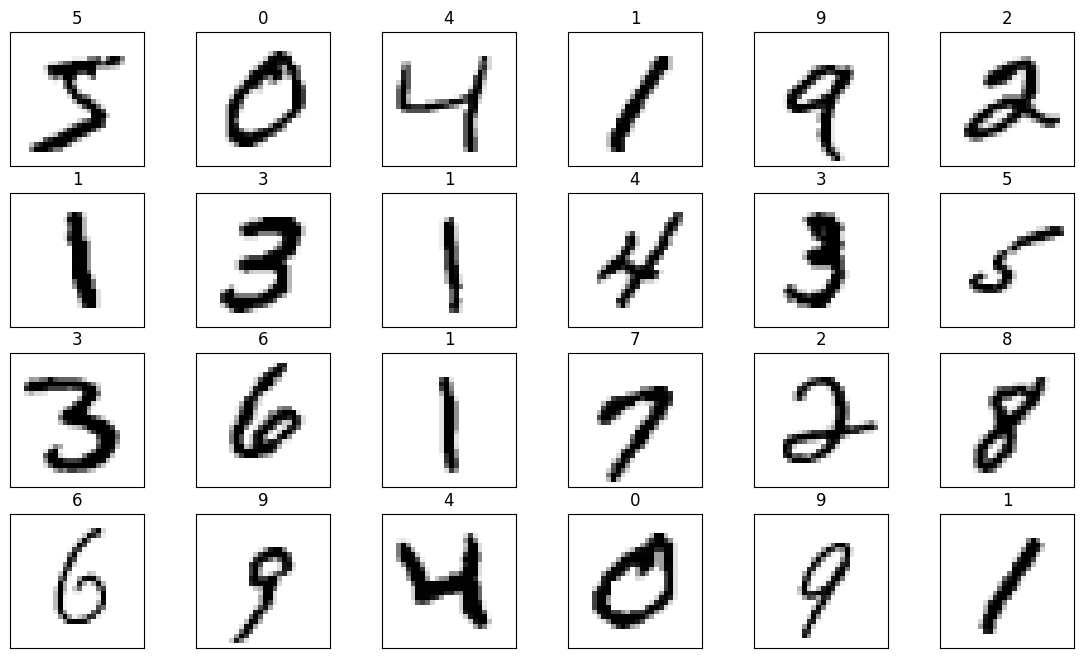

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(14,8))
for i in range(24):
    plt.subplot(4, 6, i+1)
    plt.imshow(mnist.data[i], vmin=0, vmax=255, cmap='gray_r')
    plt.xticks([])
    plt.yticks([])
    plt.title(int(mnist.targets[i]))

**2.a) [1 mark]** We can imagine the MNIST digits as 784 (28 times 28) input neurons.  We want to connect these 784 neurons to 10 output neurons, one for each digit, and see how accurately we can classify the digits.  

To find the weights in this question, we will use Ridge Regression.  `X` is the MNIST input data, divided by 255 to rescale it to between 0 and 1, and then reshaped to be a 60000x784 matrix

```
X = mnist.data.reshape((60000,28*28)).float()/255
```

The target data T is a "one-hot" representation of our outputs.  That is, instead of the desired output to be `5`, the output should be `[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]` and if the desired output should be `0`, that would be `[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]`.  

```
T = torch.nn.functional.one_hot(mnist.targets).float()
```

If our output is `Y=X @ W`, we need to find `W` such that `Y` is as close as possible to `T`.  For Ridge Regression, this is computed as

```
W = torch.inverse(X.T @ X + lambd*I) @ (X.T @ T)
```

where `I` is an identity matrix of the correct size (`torch.eye(784).float()`) and `lambd` is the $\lambda$ parameter that stops the regression from overfitting.

When building any sort of classifier model, we generally want to create the model using one set of data, and then test it on another set of data.  Here, we will use the first 5,000 data points for creating ("training") the model, and the other 55,000 for testing:

```
N = 5000
X_train, X_test = X[:N], X[N:]  # split X into two parts for training and testing
T_train, T_test = T[:N], T[N:]  # split T into two parts for training and testing
```

Given this data, you should find `W` using *only* the `X_train` and `T_train` data.  Once you find `W` you can apply it to the `X_train` and `X_test` to get `Y_train` and `Y_test`

```
Y_train = X_train @ W
Y_test = X_test @ W
```

Finally, you can compute the accuracy by determining when the output is the correct category.  Here we will do this by counting when the largest output value in each row in `Y` is at the same spot as the largest output value in each row in `T`:

```
accuracy_train = torch.sum(torch.argmax(Y_train, axis=1)==torch.argmax(T_train, axis=1))/len(Y_train)
accuracy_test = torch.sum(torch.argmax(Y_test, axis=1)==torch.argmax(T_test, axis=1))/len(Y_test)
```

- Compute the training and testing accuracy when $\lambda=1$ and we use the first 5,000 data points as for training (and test on the remaining 55,000).  Report both numbers.  
- Do we expect the testing accuracy to be larger or smaller than the training accuracy?  Why?


In [3]:
import torch

X = mnist.data.reshape((60000,28*28)).float()/255

T = torch.nn.functional.one_hot(mnist.targets).float()

I = torch.eye(784).float()
lambd = 1

W = torch.inverse(X.T @ X + lambd*I) @ (X.T @ T)

N = 5000
X_train, X_test = X[:N], X[N:]  # split X into two parts for training and testing
T_train, T_test = T[:N], T[N:]  # split T into two parts for training and testing

Y_train = X_train @ W
Y_test = X_test @ W

accuracy_train = torch.sum(torch.argmax(Y_train, axis=1)==torch.argmax(T_train, axis=1))/len(Y_train)
accuracy_test = torch.sum(torch.argmax(Y_test, axis=1)==torch.argmax(T_test, axis=1))/len(Y_test)

*Question : Do we expect the testing accuracy to be larger or smaller than the training accuracy? Why?*

Answer : The training accuracy is expected to be larger than the testing accuracy. Reason being that the training data is 50,000 less than the testing data. This gives room for less accuracy on the testing data - i.e Overfitting.



**2. b) [2 marks]**  Repeat part a) but vary the value of `lambd` from $10^{-4}$ to $10^5$.   You can use a `for` loop such as `for lambd in np.logspace(-4, 5, 11):`.  

- Generate a single plot that shows the training and testing accuracy.  Make sure to label your axes and the lines on the plot.  

- What is the best value for `lambd` (i.e. the value for which we get the best training accuracy).  
- Why does changing `lambd` affect the accuracy?  
- Why would having a large `lambd` value be good for making a biologically realistic model?

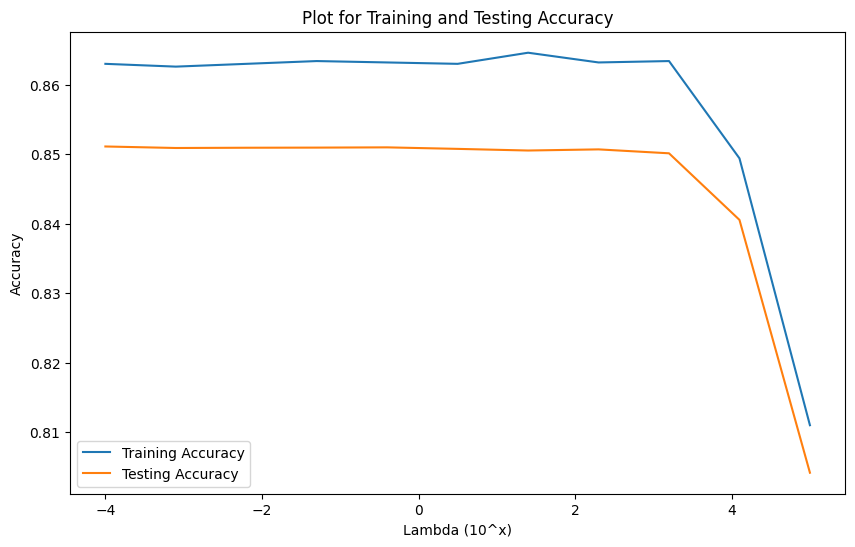

In [24]:
import torch
import numpy as np

X = mnist.data.reshape((60000,28*28)).float()/255

T = torch.nn.functional.one_hot(mnist.targets).float()

I = torch.eye(784).float()

accuracy_train_arry = []
accuracy_test_arry = []
N = 5000
lambds = np.logspace(-4, 5, 11)

for lambd in lambds:
    W = torch.inverse(X.T @ X + lambd * I) @ (X.T @ T)

    X_train, X_test = X[:N], X[N:] # split X into two parts for training and testing
    T_train, T_test = T[:N], T[N:] # split T into two parts for training and testing

    Y_train = X_train @ W
    Y_test = X_test @ W

    accuracy_train = torch.sum(torch.argmax(Y_train, axis=1) == torch.argmax(T_train, axis=1)).item() / len(Y_train)
    accuracy_test = torch.sum(torch.argmax(Y_test, axis=1) == torch.argmax(T_test, axis=1)).item() / len(Y_test)

    accuracy_train_arry.append(accuracy_train)
    accuracy_test_arry.append(accuracy_test)

# Plots
plt.figure(figsize=(10, 6))
plt.plot(np.log10(lambds), accuracy_train_arry, label='Training Accuracy')
plt.plot(np.log10(lambds), accuracy_test_arry, label='Testing Accuracy')
plt.legend()
plt.xlabel('Lambda (10^x)')
plt.ylabel('Accuracy')
plt.title('Plot for Training and Testing Accuracy')
plt.show()

*Question : What is the best value for lambd (ie the value for which we get the best training accuracy).*

In [25]:
# Answer :
best_lambd = lambds[np.argmax(accuracy_train_arry)]
print(f"The best value of lambd, for which we get the best training accuracy is: {best_lambd}")

The best value of lambd, for which we get the best training accuracy is: 25.11886431509582


*Question : Why does changing lambd affect the accuracy?*

Answer : Changing the value of lambda affects the accuracy because it influences the other constituents of the model like the bias and variance.


*Question : Why would having a large lambd value be good for making a biologically realistic model?*

Answer : For making a biologically realistic model, having a large lambda value would be good because it encourages simplicity and avoids overfitting.

**2. c) [1 mark]** The input we have used so far is not very realistic.  In real life, when we see written digits, they are under a wide range of lighting conditions. For this question, we change `X` by scaling it randomly and adding a random background brightness.

```
X = mnist.data.reshape((60000,28*28)).float()/255
X = X*(1-2*torch.rand(60000)[:,None]) + torch.rand(60000)[:,None]
```

To see what this looks like, here is how you can plot it:

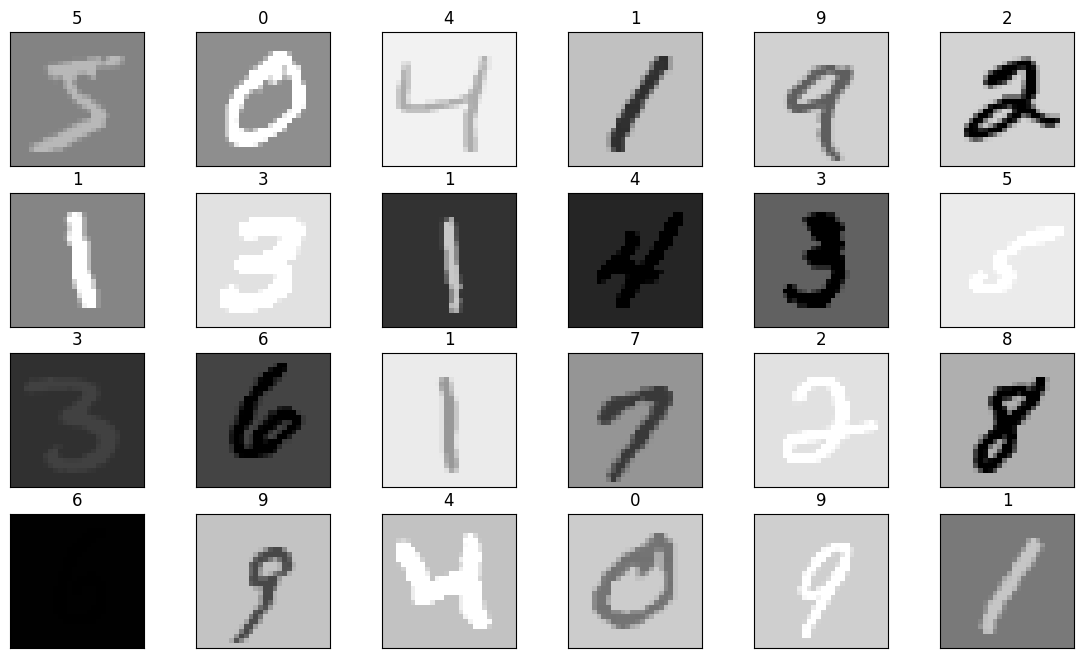

In [15]:
X = mnist.data.reshape((60000,28*28)).float()/255
X = X*(1-2*torch.rand(60000))[:,None] + torch.rand(60000)[:,None]

plt.figure(figsize=(14,8))
for i in range(24):
    plt.subplot(4, 6, i+1)
    plt.imshow(X[i].reshape(28,28), vmin=0, vmax=1, cmap='gray_r')
    plt.xticks([])
    plt.yticks([])
    plt.title(int(mnist.targets[i]))


- Generate the same plot as in 2b) but for this new dataset.  
- Is this a harder or easier task than with the original dataset?
- Is this new dataset more like the data at the retina or like the data in the ganglion cells?
- Is the original dataset more like the data at the retina or like the data in the ganglion cells?

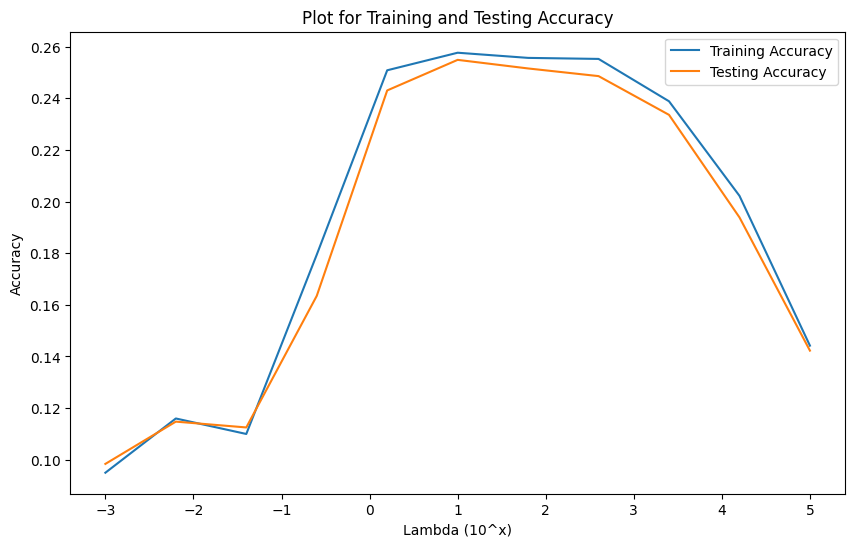

In [26]:
X = mnist.data.reshape((60000,28*28)).float()/255
X = X*(1-2*torch.rand(60000))[:,None] + torch.rand(60000)[:,None]

T = torch.nn.functional.one_hot(mnist.targets).float()

I = torch.eye(784).float()

accuracy_train_arry = []
accuracy_test_arry = []
N = 5000
lambds = np.logspace(-3, 5, 11)

for lambd in lambds:
    W = torch.inverse(X.T @ X + lambd * I) @ (X.T @ T)

    X_train, X_test = X[:N], X[N:] # split X into two parts for training and testing
    T_train, T_test = T[:N], T[N:] # split T into two parts for training and testing

    Y_train = X_train @ W
    Y_test = X_test @ W

    accuracy_train = torch.sum(torch.argmax(Y_train, axis=1) == torch.argmax(T_train, axis=1)).item() / len(Y_train)
    accuracy_test = torch.sum(torch.argmax(Y_test, axis=1) == torch.argmax(T_test, axis=1)).item() / len(Y_test)

    accuracy_train_arry.append(accuracy_train)
    accuracy_test_arry.append(accuracy_test)

# Plots
plt.figure(figsize=(10, 6))
plt.plot(np.log10(lambds), accuracy_train_arry, label='Training Accuracy')
plt.plot(np.log10(lambds), accuracy_test_arry, label='Testing Accuracy')
plt.legend()
plt.xlabel('Lambda (10^x)')
plt.ylabel('Accuracy')
plt.title('Plot for Training and Testing Accuracy')
plt.show()

In [27]:
# Answer :
best_lambd = lambds[np.argmax(accuracy_train_arry)]
print(f"The best value of lambd, for which we get the best training accuracy is: {best_lambd}")

The best value of lambd, for which we get the best training accuracy is: 10.0


*Question : Is this a harder or easier task than with the original dataset?*

Answer : Yes. Especially with the randomness.


*Question : Is this new dataset more like the data at the retina or like the data in the ganglion cells?*

Answer : It is more like data in the Retina because of the lower accuracy.

*Question : Is the original dataset more like the data at the retina or like the data in the ganglion cells?*

Answer : It is more like the data in the Ganglion cells because of the higher accuracy.


**2. d) [1 mark]** We can think of neurons in the visual system as transforming the data in various ways.  Given the dataset in 2c), neurons might be able to transform it to look more like the origin data.

Here are three data transformations that could be applied here:

Subtracting the Mean
```
X = X-torch.mean(X, axis=1)[:,None]
```

Absolute value
```
X = torch.abs(X)
```

Normalizing
```
X = X/torch.linalg.norm(X, axis=1)[:,None]
```

- Apply all three of them (in the order shown above) to the dataset and generate the same graph as in 2b) and 2c).
- How does the performance of the network compare to that of 2b) and 2c)?
- Do any of the three transformations above correspond to processing that occurs in the eye before the signal is sent to the rest of the brain?
- Given this result, why does the eye transform the data between raw rods & cones and the ganglion cells?

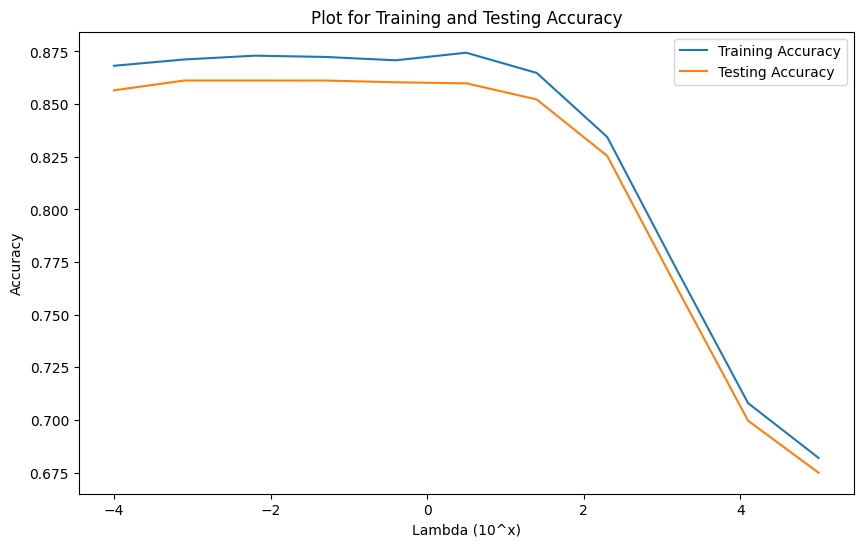

In [30]:
X = mnist.data.reshape((60000,28*28)).float()/255
X = X-torch.mean(X, axis=1)[:,None]
X = torch.abs(X)
X = X/torch.linalg.norm(X, axis=1)[:,None]

T = torch.nn.functional.one_hot(mnist.targets).float()

I = torch.eye(784).float()

accuracy_train_arry = []
accuracy_test_arry = []
N = 5000
lambds = np.logspace(-4, 5, 11)

for lambd in lambds:
    W = torch.inverse(X.T @ X + lambd * I) @ (X.T @ T)

    X_train, X_test = X[:N], X[N:] # split X into two parts for training and testing
    T_train, T_test = T[:N], T[N:] # split T into two parts for training and testing

    Y_train = X_train @ W
    Y_test = X_test @ W

    accuracy_train = torch.sum(torch.argmax(Y_train, axis=1) == torch.argmax(T_train, axis=1)).item() / len(Y_train)
    accuracy_test = torch.sum(torch.argmax(Y_test, axis=1) == torch.argmax(T_test, axis=1)).item() / len(Y_test)

    accuracy_train_arry.append(accuracy_train)
    accuracy_test_arry.append(accuracy_test)

# Plots
plt.figure(figsize=(10, 6))
plt.plot(np.log10(lambds), accuracy_train_arry, label='Training Accuracy')
plt.plot(np.log10(lambds), accuracy_test_arry, label='Testing Accuracy')
plt.legend()
plt.xlabel('Lambda (10^x)')
plt.ylabel('Accuracy')
plt.title('Plot for Training and Testing Accuracy')
plt.show()

In [32]:
# Answer :
best_lambd = lambds[np.argmax(accuracy_train_arry)]
print(f"The best value of lambd, for which we get the best training accuracy is: {best_lambd}")

The best value of lambd, for which we get the best training accuracy is: 3.1622776601683795


*Question : How does the performance of the network compare to that of 2b) and 2c)?*

Answer : The plot here looks similar to 2b.


*Question : Do any of the three transformations above correspond to processing that occurs in the eye before the signal is sent to the rest of the brain?*

Answer : Yes, subtracting the mean and normalizing can be related to processing in the eye. The eye adapts to the overall brightness of the scene (subtracting the mean), and normalizing helps in adjusting for differences in the overall intensity of the visual input.

*Question : Given this result, why does the eye transform the data between raw rods & cones and the ganglion cells?*

Answer : The transformations in the eye help in adapting to varying lighting conditions and improving the efficiency of information transmission. By normalizing and adjusting the raw input, the visual system enhances the ability to detect contrasts and patterns, making the representation more informative for further processing in the brain.

# 3. Classifying Stimuli Using Backpropogation

Regression is restricted to learning the layer of weights that produces the final output.  If we want to also learn what features are most useful for producing that output, we need a more complex learning rule, and this is typically backpropogation.  Here we will classify the same data as in question 2, and we will build up different network structures to do so.

Backpropogation tends to work best when learning on a bunch of data at the same time (a "batch").  The following code will set up the same training and testing data as in question 2, but presented in randomized batches of 1000 at a time.

```python
mnist = torchvision.datasets.MNIST(root='.', download=True, transform=torchvision.transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(torch.utils.data.Subset(mnist, np.arange(5000)),
                                           batch_size=1000, shuffle=True)
test_loader = torch.utils.data.DataLoader(torch.utils.data.Subset(mnist, np.arange(5000, 10000)),
                                          batch_size=1000, shuffle=True)
```

To create a neural network, we need to define what the weights are we will learn and we need to define the computation that the network will perform.  Here is the definition of a simple network that has an input of 784 values (the MNIST inputs), which go to 50 "hidden"-layer neurons, and then to the output 10 neurons.  So the network will learn to transform the 784 inputs into 50 new representations, and from those 50 features it will learn weights to create an output of 10 values (our 10 categories).  This is known as a multi-layer perceptron, or a standard neural network with a single hidden layer.

```python
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # these will be learned
        self.fc1 = nn.Linear(784, 50)   # the weights from the input to the new learned features (hidden layer)
        self.fc2 = nn.Linear(50, 10)    # the weights from the hidden layer to the output

    def forward(self, x):
        # the processing the network will do
        x = x.view(-1, 784)             # flatten the input from 28x28 to 784 values
        x = F.relu(self.fc1(x))         # apply the first set of weights, then apply the ReLU neuron model
        x = self.fc2(x)                 # apply the second set of weights
        return F.log_softmax(x)         # apply a softmax function as we just want one large output indicating category
    
network = Net()
```

Finally, we need to train our model.  When training, it is useful to keep track of how well the model is doing on the testing data.  Since testing the network takes time, we don't necessarily want to do it all the time.  Instead, the following code trains the network 10 times, and then records how well the network does on the training data and on the testing data.

In [33]:
!pip install torch
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import torch.optim as optim

In [34]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self, neurons = 50):
        super(Net, self).__init__()
        # these will be learned
        self.fc1 = nn.Linear(784, neurons)   # the weights from the input to the new learned features (hidden layer)
        self.fc2 = nn.Linear(neurons, 10)    # the weights from the hidden layer to the output

    def forward(self, x):
        # the processing the network will do
        x = x.view(-1, 784)             # flatten the input from 28x28 to 784 values
        x = F.relu(self.fc1(x))         # apply the first set of weights, then apply the ReLU neuron model
        x = self.fc2(x)                 # apply the second set of weights
        return F.log_softmax(x)         # apply a softmax function as we just want one large output indicating category

network = Net()

In [35]:
# create the learning rule
optimizer = optim.SGD(network.parameters(),
                      lr=0.1,   # learning rate
                      momentum=0.5)

# variables to keep track of the training and testing accuracy
accuracy_train = []
accuracy_test = []
mnist = torchvision.datasets.MNIST(root='.', download=True, transform=torchvision.transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(torch.utils.data.Subset(mnist, np.arange(5000)),
                                           batch_size=1000, shuffle=True)
test_loader = torch.utils.data.DataLoader(torch.utils.data.Subset(mnist, np.arange(5000, 10000)),
                                          batch_size=1000, shuffle=True)

def continue_training():
    network.train()      # configure the network for training
    for i in range(10):  # train the network 10 times
        correct = 0
        for data, target in train_loader:       # working in batchs of 1000
            optimizer.zero_grad()               # initialize the learning system
            output = network(data)              # feed in the data
            loss = F.nll_loss(output, target)   # compute how wrong the output is
            loss.backward()                     # change the weights to reduce error
            optimizer.step()                    # update the learning rule

            pred = output.data.max(1, keepdim=True)[1]           # compute which output is largest
            correct += pred.eq(target.data.view_as(pred)).sum()  # compute the number of correct outputs
    # update the list of training accuracy values
    score = float(correct/len(train_loader.dataset))
    accuracy_train.append(score)
    print('Iteration', len(accuracy_train), 'Training accuracy:', score)

    correct = 0
    network.eval()
    for data, target in test_loader:    # go through the test data once (in groups of 1000)
        output = network(data)                               # feed in the data
        pred = output.data.max(1, keepdim=True)[1]           # compute which output is largest
        correct += pred.eq(target.data.view_as(pred)).sum()  # compute the number of correct outputs
    # update the list of testing accuracy values
    score = float(correct/len(test_loader.dataset))
    accuracy_test.append(score)
    print('Iteration', len(accuracy_test), 'Testing accuracy:', score)


Given the above code, you can train your network 10 times by doing

```python
for i in range(10):
    continue_training()
```

If you want to continue training even more, you can just run that `for` loop again.

To plot the final accuracy results, you can use

```python
plt.figure(figsize=(12,4))
plt.plot(accuracy_train, label='training')
plt.plot(accuracy_test, label='testing')
plt.legend()
plt.xlabel('training iterations')
plt.ylabel('accuracy')
plt.show()
```

**3. a) [1 mark]** Run the model above for 10 iterations (i.e. call `continue_training` 10 times).

- Plot the training and testing accuracy.  
- Is this model better or worse than the best models developed in question 2?

<ipython-input-34-d99ac4f8532a>:16: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)         # apply a softmax function as we just want one large output indicating category


Iteration 4 Training accuracy: 0.9309999942779541
Iteration 4 Testing accuracy: 0.9039999842643738
Iteration 5 Training accuracy: 0.9368000030517578
Iteration 5 Testing accuracy: 0.9046000242233276
Iteration 6 Training accuracy: 0.9431999921798706
Iteration 6 Testing accuracy: 0.907800018787384
Iteration 7 Training accuracy: 0.946399986743927
Iteration 7 Testing accuracy: 0.9097999930381775
Iteration 8 Training accuracy: 0.9502000212669373
Iteration 8 Testing accuracy: 0.9107999801635742
Iteration 9 Training accuracy: 0.9545999765396118
Iteration 9 Testing accuracy: 0.9110000133514404
Iteration 10 Training accuracy: 0.9559999704360962
Iteration 10 Testing accuracy: 0.9120000004768372
Iteration 11 Training accuracy: 0.9602000117301941
Iteration 11 Testing accuracy: 0.9142000079154968
Iteration 12 Training accuracy: 0.9649999737739563
Iteration 12 Testing accuracy: 0.9142000079154968
Iteration 13 Training accuracy: 0.9666000008583069
Iteration 13 Testing accuracy: 0.9147999882698059


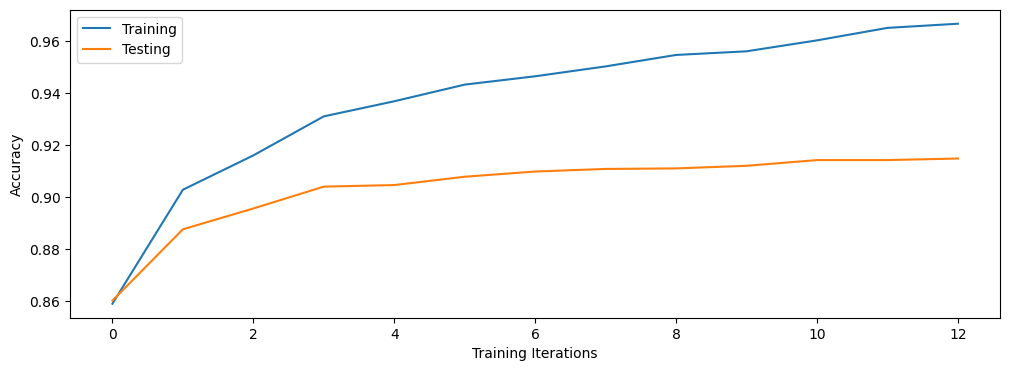

In [37]:
for i in range(10):
    continue_training()
plt.figure(figsize=(12,4))
plt.plot(accuracy_train, label='Training')
plt.plot(accuracy_test, label='Testing')
plt.legend()
plt.xlabel('Training Iterations')
plt.ylabel('Accuracy')
plt.show()

*Question : Is this model better or worse than the best models developed in question 2?*

Answer : Yes it is better. The accuracy for both the training data and the testing data are closer to 1.0 compared to Question 2.

**3. b) [1 mark]** Repeat question 3a five times.  This does not mean to run a single model for 50 iterations.  Rather, you need to reset the model and train it again.  The easiest way to do this is to recreate the network and the optimizer like this:

```python
network = Net()
optimizer = optim.SGD(network.parameters(),
                      lr=0.1,
                      momentum=0.5)
```

- Make a plot showing the 5 different training accuracies and 5 different testing accuracies
- Also show the average training and testing accuracy on the plot.
- Each of the 5 models should show slightly different accuracies.  Why is this the case?


<ipython-input-34-d99ac4f8532a>:16: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)         # apply a softmax function as we just want one large output indicating category


Iteration 1 Training accuracy: 0.8611999750137329
Iteration 1 Testing accuracy: 0.8555999994277954
Iteration 2 Training accuracy: 0.9035999774932861
Iteration 2 Testing accuracy: 0.8866000175476074
Iteration 3 Training accuracy: 0.9179999828338623
Iteration 3 Testing accuracy: 0.896399974822998
Iteration 4 Training accuracy: 0.9272000193595886
Iteration 4 Testing accuracy: 0.9025999903678894
Iteration 5 Training accuracy: 0.9330000281333923
Iteration 5 Testing accuracy: 0.9065999984741211
Iteration 6 Training accuracy: 0.9369999766349792
Iteration 6 Testing accuracy: 0.9082000255584717
Iteration 7 Training accuracy: 0.942799985408783
Iteration 7 Testing accuracy: 0.9093999862670898
Iteration 8 Training accuracy: 0.9477999806404114
Iteration 8 Testing accuracy: 0.9111999869346619
Iteration 9 Training accuracy: 0.9524000287055969
Iteration 9 Testing accuracy: 0.9118000268936157
Iteration 10 Training accuracy: 0.9557999968528748
Iteration 10 Testing accuracy: 0.9121999740600586
Iteration 

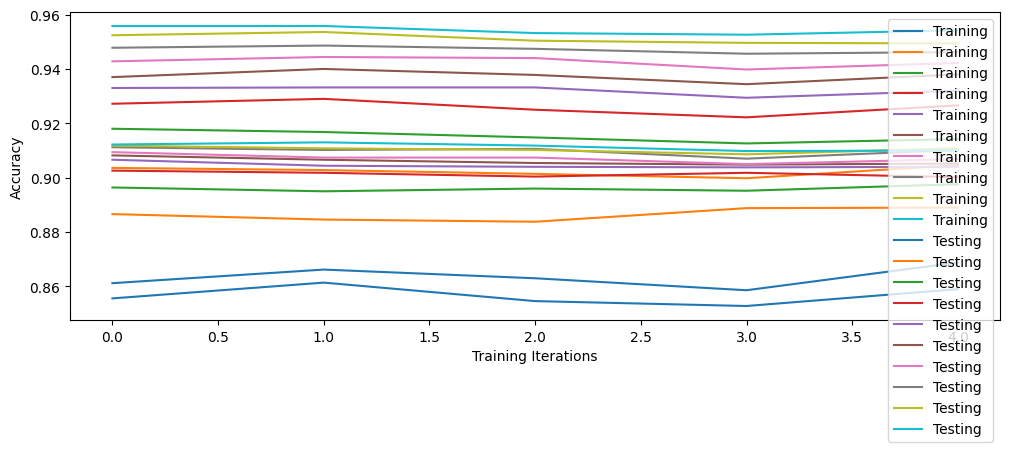

In [38]:

final_accuracy_train = []
final_accuracy_test = []
for run in range(5):
  network = Net()
  optimizer = optim.SGD(network.parameters(),lr=0.1,momentum=0.5)
  accuracy_train = []
  accuracy_test = []
  for i in range(10):
    continue_training()
  final_accuracy_train.append(accuracy_train)
  final_accuracy_test.append(accuracy_test)

plt.figure(figsize=(12,4))
plt.plot(final_accuracy_train, label='Training')
plt.plot(final_accuracy_test, label='Testing')
plt.legend()
plt.xlabel('Training Iterations')
plt.ylabel('Accuracy')
plt.show()

*Question : Each of the 5 models should show slightly different accuracies. Why is this the case?*

Answer : This is because of the randomness of the data selected for training, as well as the hidden layer used to build the network and ultimately train the model. As the model gets better, it has learnt from previous iterations and so has a higher accuracy.

**3. c) [1 mark]** Repeat question 3b varying the number of neurons in the hidden layer of the network.  The current value is 50.  Try it with 5, 10, 20, 50, and 100 neurons.  For each number of neurons, repeat five times and take the average (like in question 3b).  

- Plot the final testing accuracy on the y-axis and the number of neurons on the x-axis.  Note that to speed things up you can remove the testing computation from continue_training until the very end, since we only need the final testing score.


<ipython-input-34-d99ac4f8532a>:16: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)         # apply a softmax function as we just want one large output indicating category


Iteration 1 Training accuracy: 0.6952000260353088
Iteration 1 Testing accuracy: 0.7003999948501587
Iteration 2 Training accuracy: 0.8136000037193298
Iteration 2 Testing accuracy: 0.7861999869346619
Iteration 3 Training accuracy: 0.8428000211715698
Iteration 3 Testing accuracy: 0.8169999718666077
Iteration 4 Training accuracy: 0.8597999811172485
Iteration 4 Testing accuracy: 0.828000009059906
Iteration 5 Training accuracy: 0.8691999912261963
Iteration 5 Testing accuracy: 0.8348000049591064
Iteration 6 Training accuracy: 0.8754000067710876
Iteration 6 Testing accuracy: 0.8396000266075134
Iteration 7 Training accuracy: 0.8802000284194946
Iteration 7 Testing accuracy: 0.8434000015258789
Iteration 8 Training accuracy: 0.8889999985694885
Iteration 8 Testing accuracy: 0.8460000157356262
Iteration 9 Training accuracy: 0.8939999938011169
Iteration 9 Testing accuracy: 0.8482000231742859
Iteration 10 Training accuracy: 0.8956000208854675
Iteration 10 Testing accuracy: 0.8492000102996826
Iteration

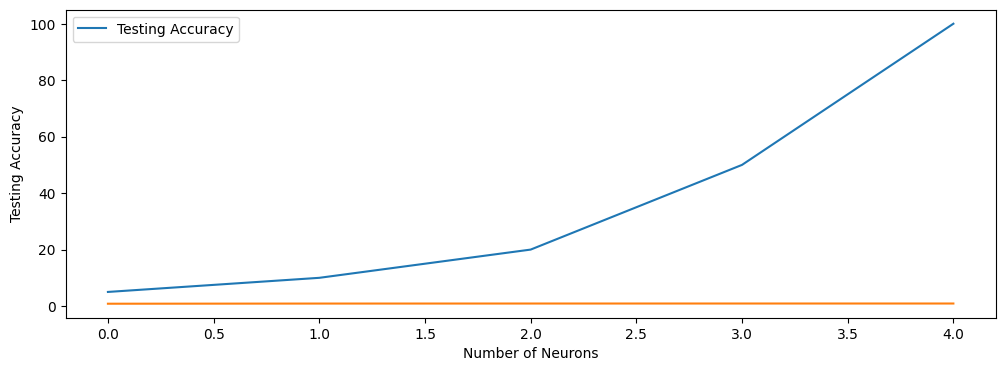

In [39]:
average_accuracies = []
hidden_layer_neuron_set = [5, 10, 20, 50, 100]
for num_neurons in hidden_layer_neuron_set:
  final_accuracy_train = []
  final_accuracy_test = []
  for run in range(5):
    network = Net(num_neurons)
    optimizer = optim.SGD(network.parameters(),lr=0.1,momentum=0.5)
    accuracy_train = []
    accuracy_test = []
    for i in range(10):
      continue_training()
    final_accuracy_train.append(accuracy_train)
    final_accuracy_test.append(accuracy_test)
  average_accuracies.append(np.mean(final_accuracy_test))

plt.figure(figsize=(12,4))
plt.plot(hidden_layer_neuron_set, label='Testing Accuracy')
plt.plot(average_accuracies)
plt.legend()
plt.xlabel('Number of Neurons')
plt.ylabel('Testing Accuracy')
plt.show()

**3. d) [2 marks]** Now we will add a convolution layer to our network.  The following network adds two convolution layers before two normal neural network layers.

```python
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 12, kernel_size=5)  # set the size of the convolution to 5x5, and have 12 of them
        self.conv2 = nn.Conv2d(12, 20, kernel_size=5)
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))  # make sure to do max pooling after the convolution layers
        x = F.relu(F.max_pool2d(self.conv2(x), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x)
```

The following code can be used to plot the learned features in the first layer:
```python
plt.figure(figsize=(12,5))
for i in range(12):
    plt.subplot(3, 4, i+1)
    plt.imshow(network.conv1.weight[i][0].detach().numpy(), cmap='gray', interpolation='nearest')
    plt.xticks([])
    plt.yticks([])
plt.show()
```

- Train the model through 40 iterations and generate a plot of training and testing accuracy over time.
- Does this perform better or worse than the previous models in this assignment?
- What advantages and disadvantages do you see with this approach (in comparison to the previous parts of the assignment)?
- Plot the features learned by the first convolution layer.  How do they compare to real features detected in the V1 area of the brain?

<ipython-input-40-9f06bc050d83>:15: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Iteration 1 Training accuracy: 0.8519999980926514
Iteration 1 Testing accuracy: 0.866599977016449
Iteration 2 Training accuracy: 0.9373999834060669
Iteration 2 Testing accuracy: 0.9282000064849854
Iteration 3 Training accuracy: 0.9620000123977661
Iteration 3 Testing accuracy: 0.942799985408783
Iteration 4 Training accuracy: 0.97079998254776
Iteration 4 Testing accuracy: 0.954800009727478
Iteration 5 Training accuracy: 0.9787999987602234
Iteration 5 Testing accuracy: 0.9521999955177307
Iteration 6 Training accuracy: 0.9868000149726868
Iteration 6 Testing accuracy: 0.9606000185012817
Iteration 7 Training accuracy: 0.9901999831199646
Iteration 7 Testing accuracy: 0.9603999853134155
Iteration 8 Training accuracy: 0.9937999844551086
Iteration 8 Testing accuracy: 0.9656000137329102
Iteration 9 Training accuracy: 0.995199978351593
Iteration 9 Testing accuracy: 0.9667999744415283
Iteration 10 Training accuracy: 0.9972000122070312
Iteration 10 Testing accuracy: 0.9661999940872192
Iteration 11 T

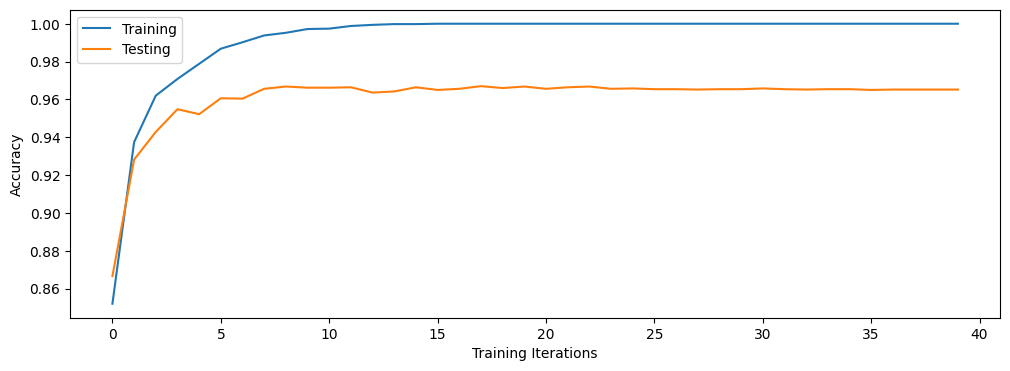

In [40]:
class Net(nn.Module):
    def __init__(self, neurons = 50):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 12, kernel_size=5)  # set the size of the convolution to 5x5, and have 12 of them
        self.conv2 = nn.Conv2d(12, 20, kernel_size=5)
        self.fc1 = nn.Linear(320, neurons)
        self.fc2 = nn.Linear(neurons, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))  # make sure to do max pooling after the convolution layers
        x = F.relu(F.max_pool2d(self.conv2(x), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x)

network = Net()
optimizer = optim.SGD(network.parameters(),lr=0.1,momentum=0.5)
accuracy_train = []
accuracy_test = []
for i in range(40):
  continue_training()

plt.figure(figsize=(12,4))
plt.plot(accuracy_train, label='Training')
plt.plot(accuracy_test, label='Testing')
plt.legend()
plt.xlabel('Training Iterations')
plt.ylabel('Accuracy')
plt.show()


*Question : Does this perform better or worse than the previous models in this assignment?*

Answer : It performs better because the training accuracy attains perfection (of 1.0) after about 16-17 iterations


*Question : What advantages and disadvantages do you see with this approach (in comparison to the previous parts of the assignment)?*

Answer : It is advantageous in that it runs for a shorter period of time compared to others and it is the only network whose training accuracy has reached 1.0. However, the disadvantage is that since the training data quickly reaches 1.0, the test data is hard to catch up with it.


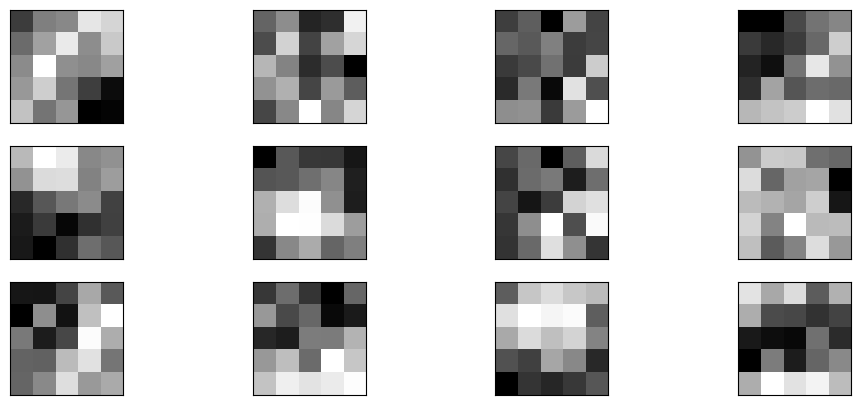

In [41]:
plt.figure(figsize=(12,5))
for i in range(12):
    plt.subplot(3, 4, i+1)
    plt.imshow(network.conv1.weight[i][0].detach().numpy(), cmap='gray', interpolation='nearest')
    plt.xticks([])
    plt.yticks([])
plt.show()

**BONUS [1 mark]** Try to improve the neural network.  You want to get the best testing accuracy you can.  Try at least two different approaches and report your results.

1. First approach was to increase the number of neurons in the hidden layer to 500.

Effect: The Testing accuracy reached 1.0 around 13 iterations. And the Testing accuracy ot slighty increased to about 0.969 from the previous 0.965 average.

<ipython-input-40-9f06bc050d83>:15: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Iteration 1 Training accuracy: 0.819599986076355
Iteration 1 Testing accuracy: 0.8795999884605408
Iteration 2 Training accuracy: 0.949999988079071
Iteration 2 Testing accuracy: 0.9348000288009644
Iteration 3 Training accuracy: 0.9588000178337097
Iteration 3 Testing accuracy: 0.8691999912261963
Iteration 4 Training accuracy: 0.980400025844574
Iteration 4 Testing accuracy: 0.9592000246047974
Iteration 5 Training accuracy: 0.9868000149726868
Iteration 5 Testing accuracy: 0.9595999717712402
Iteration 6 Training accuracy: 0.9927999973297119
Iteration 6 Testing accuracy: 0.9648000001907349
Iteration 7 Training accuracy: 0.9954000115394592
Iteration 7 Testing accuracy: 0.9667999744415283
Iteration 8 Training accuracy: 0.9972000122070312
Iteration 8 Testing accuracy: 0.9613999724388123
Iteration 9 Training accuracy: 0.9983999729156494
Iteration 9 Testing accuracy: 0.9688000082969666
Iteration 10 Training accuracy: 0.9991999864578247
Iteration 10 Testing accuracy: 0.9685999751091003
Iteration 1

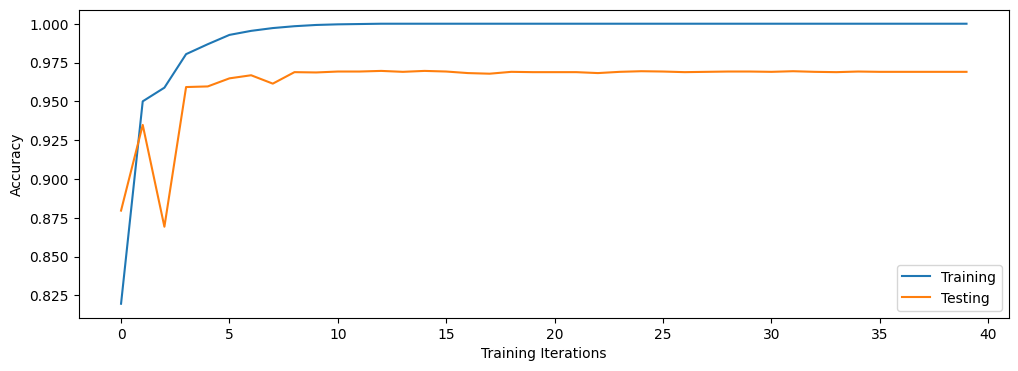

In [42]:
network = Net(500)
optimizer = optim.SGD(network.parameters(),lr=0.1,momentum=0.5)
accuracy_train = []
accuracy_test = []
for i in range(40):
  continue_training()

plt.figure(figsize=(12,4))
plt.plot(accuracy_train, label='Training')
plt.plot(accuracy_test, label='Testing')
plt.legend()
plt.xlabel('Training Iterations')
plt.ylabel('Accuracy')
plt.show()

2. Second approach is to increase the batch size for aining data

Effect: N/A

<ipython-input-40-9f06bc050d83>:15: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Iteration 1 Training accuracy: 0.31779998540878296
Iteration 1 Testing accuracy: 0.3441999852657318
Iteration 2 Training accuracy: 0.8144000172615051
Iteration 2 Testing accuracy: 0.8687999844551086
Iteration 3 Training accuracy: 0.9265999794006348
Iteration 3 Testing accuracy: 0.9172000288963318
Iteration 4 Training accuracy: 0.9466000199317932
Iteration 4 Testing accuracy: 0.9358000159263611
Iteration 5 Training accuracy: 0.9584000110626221
Iteration 5 Testing accuracy: 0.9416000247001648
Iteration 6 Training accuracy: 0.9684000015258789
Iteration 6 Testing accuracy: 0.9472000002861023
Iteration 7 Training accuracy: 0.9807999730110168
Iteration 7 Testing accuracy: 0.9520000219345093
Iteration 8 Training accuracy: 0.9800000190734863
Iteration 8 Testing accuracy: 0.9534000158309937
Iteration 9 Training accuracy: 0.9833999872207642
Iteration 9 Testing accuracy: 0.9521999955177307
Iteration 10 Training accuracy: 0.989799976348877
Iteration 10 Testing accuracy: 0.9580000042915344
Iteratio

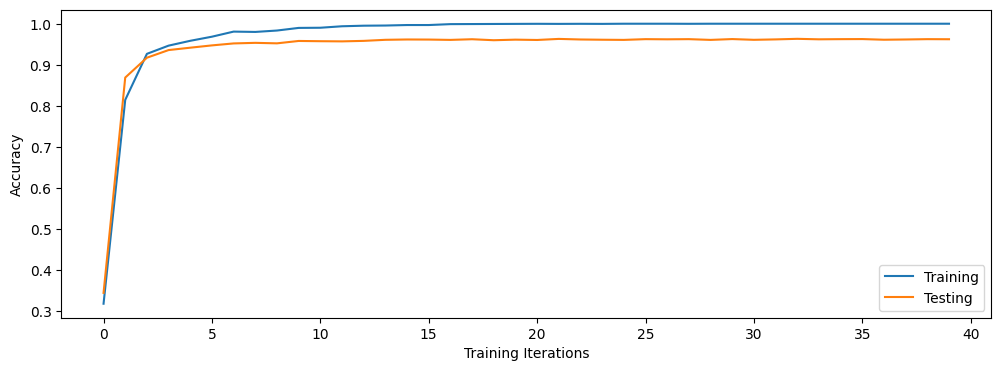

In [49]:
train_loader = torch.utils.data.DataLoader(torch.utils.data.Subset(mnist, np.arange(5000)),
                                           batch_size=2000, shuffle=True)
test_loader = torch.utils.data.DataLoader(torch.utils.data.Subset(mnist, np.arange(5000, 10000)),
                                          batch_size=1000, shuffle=True)

network = Net()
optimizer = optim.SGD(network.parameters(),lr=0.1,momentum=0.5)
accuracy_train = []
accuracy_test = []
for i in range(40):
  continue_training()

plt.figure(figsize=(12,4))
plt.plot(accuracy_train, label='Training')
plt.plot(accuracy_test, label='Testing')
plt.legend()
plt.xlabel('Training Iterations')
plt.ylabel('Accuracy')
plt.show()